In [2]:
import scipy
from scipy import interpolate
from scipy import integrate
import numpy as np
import matplotlib.pyplot as plt

In [3]:
a = 0.5
b = 0.3
N = 1000000
S = 990000
I = 7000
R = 3000
t_0, t_f = 0, 25

17


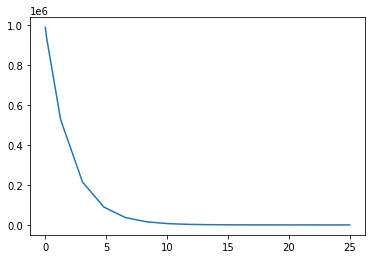

In [13]:
def dsdt(t,S):
    return (- a * S)

suscept = integrate.solve_ivp(dsdt, (t_0, t_f), [S], dense_output=True)

S_t, S_y = suscept.t, suscept.y[0]
plt.plot(suscept.t, suscept.y[0])
print(len(suscept.t))
plt.show()

13


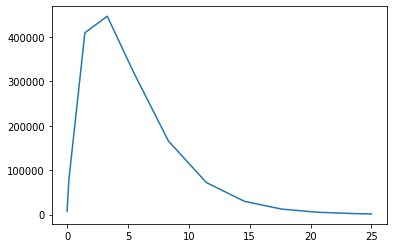

In [11]:
def didt(t,i):
    return (a * suscept.sol(t) - b * i)

infect = integrate.solve_ivp(didt, (t_0, t_f), [I], dense_output=True)
I_t, I_y = infect.t, infect.y[0]
plt.plot(infect.t, infect.y[0])
print(len(infect.t))
plt.show()

7


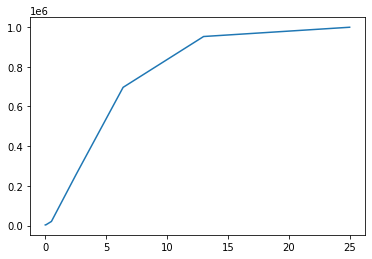

In [12]:
def drdt(t, r):
    return (b * infect.sol(t))

recov = integrate.solve_ivp(drdt, (t_0, t_f), [R], dense_output=True)

R_t, R_y = recov.t, recov.y[0]
plt.plot(recov.t, recov.y[0])

plt.show()

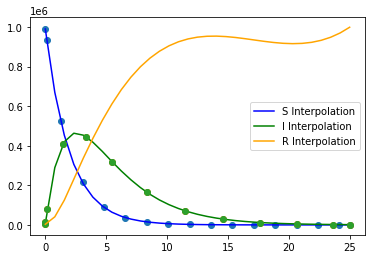

In [16]:
f1 = interpolate.interp1d(S_t, S_y, kind='cubic')
plt.plot(S_t, S_y, 'o')
more_date = np.linspace(0, 25, 100)
plt.plot(more_date, f1(more_date), color='blue', label='S Interpolation')

f2 = interpolate.interp1d(I_t, I_y, kind='cubic')
plt.plot(I_t, I_y, 'o')
more_date = np.linspace(0, 25, 100)
plt.plot(more_date, f2(more_date), color='green', label='I Interpolation')

f3 = interpolate.interp1d(R_t, R_y, kind='cubic')
plt.plot(I_t, I_y, 'o')
more_date = np.linspace(0, 25, 100)
plt.plot(more_date, f3(more_date), color='orange', label='R Interpolation')
plt.legend()
plt.show()